In [1]:
import importlib
from utils import aspect_extraction, sentiment_extraction, general, embeddings, visualizer
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
importlib.reload(aspect_extraction)
importlib.reload(sentiment_extraction)
importlib.reload(general)
importlib.reload(embeddings)
importlib.reload(visualizer)

<module 'utils.visualizer' from '/home/alessia/Documenti/University/Text mining and sentiment analysis/progetto/tinder/utils/visualizer.py'>

In [3]:
def get_query_polarity_percentage(query, aspects_embedding, aspects_adjs, aspects_score, not_query = [], threshold=0.5, verbose=False):
    query_ranking = embeddings.get_query_similarities(
    aspects_embedding, query, not_query=not_query)
    
    query_ranking = pd.concat([aspects_score, query_ranking], axis=1).rename(columns={
        0: "score", 1: "query_similarity"}).sort_values(by=["query_similarity", "score"], ascending=False)
    query_aspects = query_ranking[query_ranking.query_similarity >= threshold].index

    pos, neg = sentiment_extraction.get_aspects_polarity_percentage(
        query_aspects, aspects_adjs, verbose=verbose)
        
    return pos, neg, query_aspects, query_ranking

In [4]:
dating_app_polarities = pd.DataFrame(columns=["Aspect", "Tinder", "Bumble", "Hinge"])
dating_app_polarities["Aspect"] = [
                                    "Casual sex pos", 
                                    "Casual sex neg",
                                    "Relationship pos", 
                                    "Relationship neg", 
                                    "Friendship pos", 
                                    "Friendship neg", 
                                    "Curiosity pos",
                                    "Curiosity neg",
                                    "Women pos",
                                    "Women neg",
                                    "Men pos",
                                    "Men neg",
                                    "Self esteem neg",
                                    "Self esteem pos",
                                    "Appearence pos",
                                    "Appearence neg",
                                    "Intelligence pos",
                                    "Intelligence neg"
                                ]

## __Tinder__

In [5]:
aspects_adjs, aspects_freq = aspect_extraction.get_aspects_adjs_and_freq(app= "tinder")

In [6]:
aspects_polarity = sentiment_extraction.get_aspects_polarity(aspects_adjs, app ="tinder")
aspects_score = general.normalize_series(aspects_polarity + aspects_freq)
aspects_embedding = embeddings.get_aspects_embeddings(aspects_freq, app="tinder")

In [7]:
tinder_polarities = []

__Casual sex__

In [ ]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["sex", "casual"], not_query= ["couple"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.60, verbose=True)

In [ ]:
print(f"positive: {pos}, negative: {neg}")
tinder_polarities.append(pos)
tinder_polarities.append(neg)

positive: 52.63157894736842, negative: 47.368421052631575


In [ ]:
query_ranking.head()

score  query_similarity
sex     0.698583          0.812611
sexual  0.733324          0.792364
sexo    0.754405          0.715993
porn    0.741664          0.679251
sexy    0.768472          0.661601

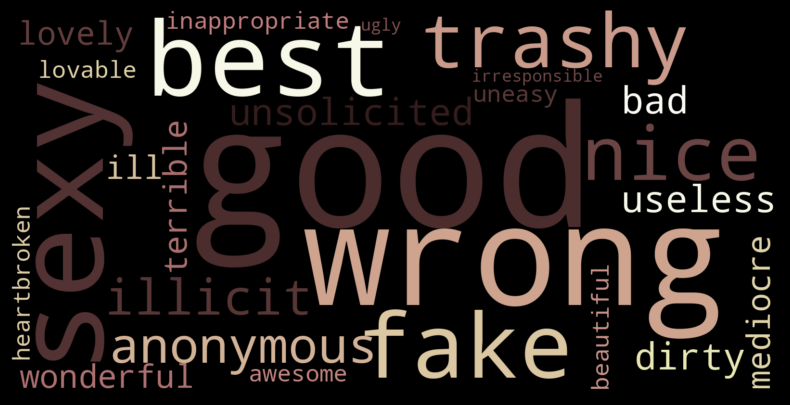

In [ ]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [ ]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/52 [00:00<?, ?it/s]

['gay', 'great']


In [ ]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/107 [00:00<?, ?it/s]

['wrong', 'bad']


__Relationship__

In [ ]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "romantic", "couple"], not_query= ["friendship"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.72)

In [12]:
print(f"positive: {pos}, negative: {neg}")
tinder_polarities.append(pos)
tinder_polarities.append(neg)

positive: 72.32767232767233, negative: 27.672327672327672


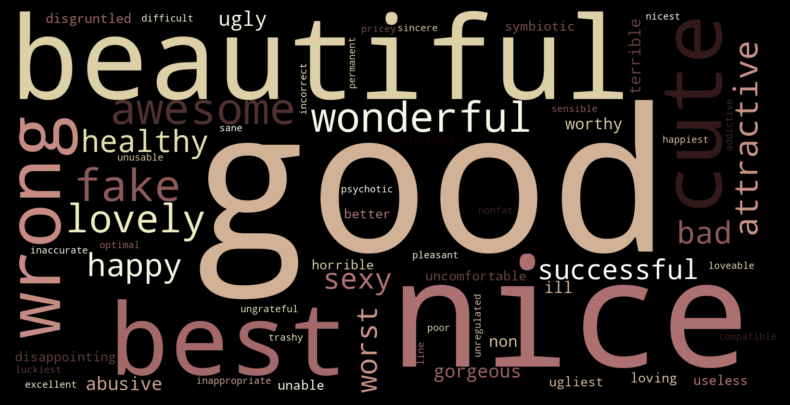

In [31]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [32]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/725 [00:00<?, ?it/s]

['beloved', 'worthy', 'gay', 'great', 'bisexual']
['happiest', 'happy']
['good', 'better']
['interested', 'interesting']
['ideal', 'like']


In [33]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/274 [00:00<?, ?it/s]

['poor', 'blind', 'needy', 'dead']
['psychotic', 'stupid', 'silly']
['wrong', 'bad']
['difficult', 'hard']
['ill', 'upset']
['disappointed', 'disappointing']
['ugliest', 'ugly']


__Friendship__

In [ ]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends", "networking"], not_query= ["love"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.70)
print(f"positive: {pos}, negative: {neg}")

In [14]:
tinder_polarities.append(pos)
tinder_polarities.append(neg)

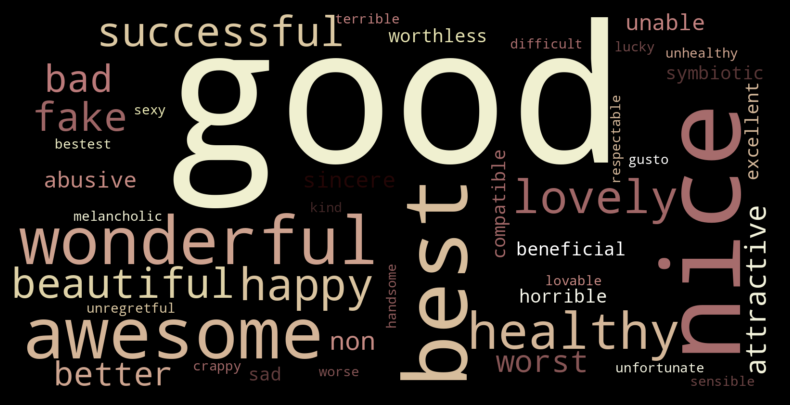

In [242]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [7]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/980 [00:00<?, ?it/s]

['dear', 'gay', 'great', 'intimate']
['good', 'plus', 'better']
['sensible', 'reasonable']
['interested', 'interesting']
['kind', 'like']


In [8]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/150 [00:00<?, ?it/s]

['stupid', 'melancholic', 'criminal', 'unfortunate']
['hard', 'difficult']
['worse', 'bad']
['dead', 'needy']
['rough', 'unknown']


__Curiosity__

In [15]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity", "exploration", "social"], not_query= ["space"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.70)

expansion: ['curiosity', 'exploration', 'social', 'discovery', 'innovation', 'insights', 'marketing', 'acquisition']


In [16]:
print(f"positive: {pos}, negative: {neg}")
tinder_polarities.append(pos)
tinder_polarities.append(neg)

positive: 27.586206896551722, negative: 72.41379310344827


In [25]:
query_ranking.head()

score  query_similarity
innovation  0.767381          0.800823
marketing   0.706688          0.769475
technology  0.731994          0.759639
insights    0.749532          0.733622
social      0.744084          0.712820

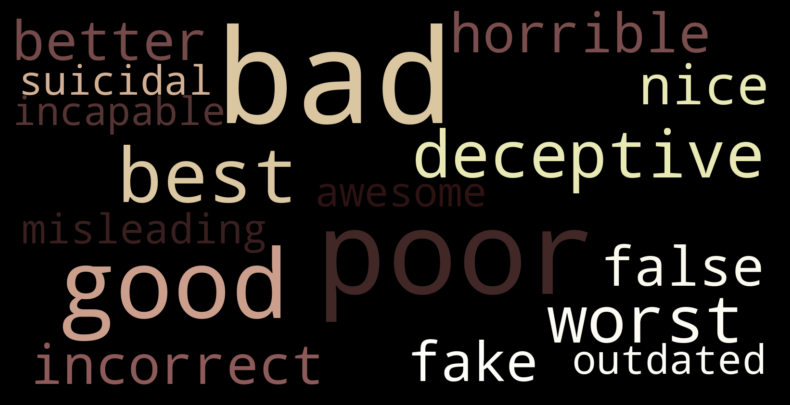

In [26]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [29]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/25 [00:00<?, ?it/s]

['good', 'better']


In [30]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/51 [00:00<?, ?it/s]

__Women__

In [17]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["women", "girls"], not_query= ["boy"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.74)
print(f"positive: {pos}, negative: {neg}")

tinder_polarities.append(pos)
tinder_polarities.append(neg)

expansion: ['women', 'girls', 'females', 'ladies', 'womens', 'feminists', 'models']
positive: 70.90810222947253, negative: 29.09189777052746


In [47]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [48]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/1765 [00:00<?, ?it/s]

['dear', 'narcissist', 'deviant', 'gay', 'great', 'intellectual', 'bisexual']
['quality', 'good', 'better']
['interested', 'interesting']
['aged', 'rich']
['possible', 'choice']
['cute', 'cuter']
['okay', 'compliment']
['horny', 'hornier']
['kind', 'like']


In [49]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/796 [00:00<?, ?it/s]

['stupid', 'undesirable', 'shrew', 'unfortunate', 'psychotic', 'loser']
['poor', 'dead', 'needy', 'lost']
['uglier', 'ugly']
['nastiest', 'nasty']
['hurt', 'cold']
['bad', 'wrong']
['hard', 'difficult']
['dumb', 'dumbest']
['conceited', 'vain']
['cheap', 'cheaper']


__Men__

In [18]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["man", "boy", "guy"], not_query=["girls", "women"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.84)

expansion: ['man', 'boy', 'guy', 'dude', 'he', 'brother', 'bro', 'boi']


In [19]:
print(f"positive: {pos}, negative: {neg}")
tinder_polarities.append(pos)
tinder_polarities.append(neg)

positive: 74.46327683615819, negative: 25.536723163841806


In [8]:
query_ranking.head()

score  query_similarity
dude  0.773058          0.913715
boy   0.801145          0.886162
guy   0.924460          0.868454
man   0.901469          0.840760
bro   0.750096          0.836664

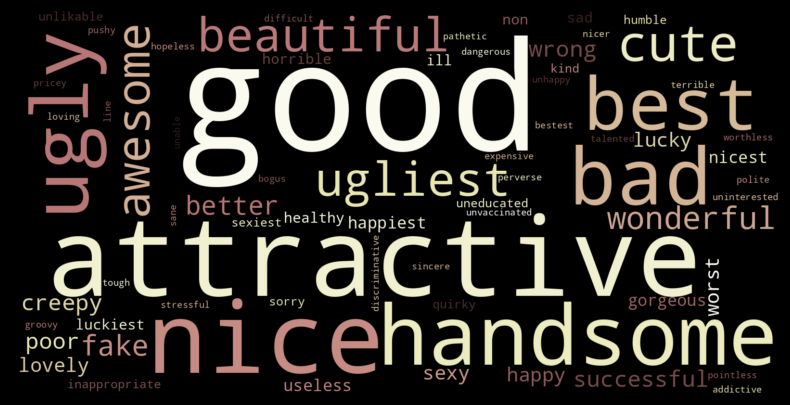

In [9]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [10]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/1004 [00:00<?, ?it/s]

['bisexual', 'great', 'gay']
['better', 'good']
['happiest', 'happy']
['sexy', 'sexiest']
['lucky', 'luckiest']
['nicer', 'nicest']
['kind', 'ideal']
['interested', 'interesting']
['rich', 'aged']


In [11]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/315 [00:00<?, ?it/s]

['stupid', 'tough', 'mortal', 'homeless']
['wrong', 'bad']
['ugliest', 'ugly']
['poor', 'sick']
['annoying', 'evil']
['upset', 'ill']
['difficult', 'hard']


__Self Esteem__

In [20]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.75)

expansion: ['self', 'esteem', 'confidence', 'yourself', 'self-esteem', 'myself', 'themselves']


In [21]:
print(f"positive: {pos}, negative: {neg}")
tinder_polarities.append(pos)
tinder_polarities.append(neg)

positive: 54.54545454545454, negative: 45.45454545454545


In [18]:
query_ranking.head()

score  query_similarity
self        0.742616          0.862039
yourself    0.743669          0.850462
myself      0.729832          0.794236
confidence  0.755656          0.780320
esteem      0.748202          0.756709

In [19]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [20]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/22 [00:00<?, ?it/s]

['better', 'good']


In [21]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/77 [00:00<?, ?it/s]

__Attractiveness (appearence)__

In [22]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence", "beauty"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.55)
print(f"positive: {pos}, negative: {neg}")

tinder_polarities.append(pos)
tinder_polarities.append(neg)

expansion: ['attractiveness', 'appearence', 'beauty', 'appearance', 'apperance', 'personality', 'sexiness', 'stupidity']
positive: 48.717948717948715, negative: 51.28205128205128


In [38]:
query_ranking.head()

score  query_similarity
appearance      0.765046          0.774414
personality     0.791893          0.741813
attractiveness  0.736023          0.695761
stupidity       0.749771          0.656400
perception      0.724084          0.581319

In [40]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [41]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/43 [00:00<?, ?it/s]

['plus', 'better', 'good']
['interested', 'interesting']


In [42]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/26 [00:00<?, ?it/s]

['wrong', 'bad']


__Attractiveness (intelligence)__

In [23]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.6)
print(f"positive: {pos}, negative: {neg}")

tinder_polarities.append(pos)
tinder_polarities.append(neg)

expansion: ['witty', 'intelligence', 'intelligent', 'clever', 'humour', 'knowledge', 'profound']
positive: 26.01626016260163, negative: 73.98373983739837


In [50]:
query_ranking.head()

score  query_similarity
intelligent   0.744974          0.778345
intelligence  0.732932          0.716737
knowledge     0.750520          0.700541
humour        0.742442          0.689580
wise          0.722925          0.668579

In [51]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [54]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="pos")

  0%|          | 0/68 [00:00<?, ?it/s]

['plus', 'better', 'good']
['great', 'intellectual']


In [55]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity="neg")

  0%|          | 0/180 [00:00<?, ?it/s]

['wrong', 'bad']
['annoying', 'offensive']


In [30]:
dating_app_polarities["Tinder"] = tinder_polarities

## __Bumble__

In [31]:
aspects_adjs, aspects_freq = aspect_extraction.get_aspects_adjs_and_freq(app= "bumble")

In [32]:
aspects_polarity = sentiment_extraction.get_aspects_polarity(aspects_adjs, app = "bumble")
aspects_score = general.normalize_series(aspects_polarity + aspects_freq)
aspects_embedding = embeddings.get_aspects_embeddings(aspects_freq, app = "bumble")

In [34]:
bumble_polarities = []

__Casual sex__

In [33]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["sex", "casual"], not_query= ["couple"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.5)

expansion: ['sex', 'casual', 'sexual', 'sexo', 'sensual', 'anal', 'erotic']


In [35]:
print(f"positive: {pos}, negative: {neg}")
bumble_polarities.append(pos)
bumble_polarities.append(neg)

positive: 68.75, negative: 31.25


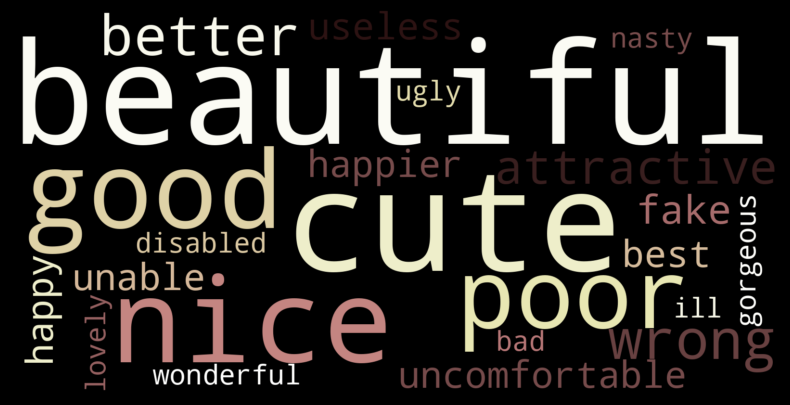

In [21]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [22]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/80 [00:00<?, ?it/s]

['gay', 'great', 'bisexual']
['better', 'good']
['happier', 'happy']


In [23]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/51 [00:00<?, ?it/s]

['sick', 'poor', 'dead', 'disabled']
['wrong', 'bad']
['dumb', 'dumbest']


__Relationship__

In [36]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "romantic", "couple"], not_query= ["friendship"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.72)

expansion: ['relationship', 'romantic', 'couple', 'married', 'boyfriend', 'husband', 'date', 'couples']


In [37]:
print(f"positive: {pos}, negative: {neg}")
bumble_polarities.append(pos)
bumble_polarities.append(neg)

positive: 70.8029197080292, negative: 29.1970802919708


In [29]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [30]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/159 [00:00<?, ?it/s]

['great', 'gay', 'intimate']
['better', 'good']
['happier', 'happy']
['interested', 'interesting']


In [31]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/99 [00:00<?, ?it/s]

['needy', 'poor', 'sick', 'blind', 'dead']
['wrong', 'bad']
['dumb', 'dumbest']


__Friendship__

In [38]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends", "networking"], not_query= ["love"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.68)

expansion: ['friendship', 'friends', 'networking', 'relationships', 'connections', 'relationship', 'social', 'friendships']


In [39]:
print(f"positive: {pos}, negative: {neg}")
bumble_polarities.append(pos)
bumble_polarities.append(neg)

positive: 72.20367278797997, negative: 27.79632721202003


In [41]:
query_ranking.head()

score  query_similarity
relationships  0.767987          0.874245
relationship   0.783984          0.821643
friendship     0.658832          0.785669
friends        0.849506          0.766438
friendships    0.710590          0.758929

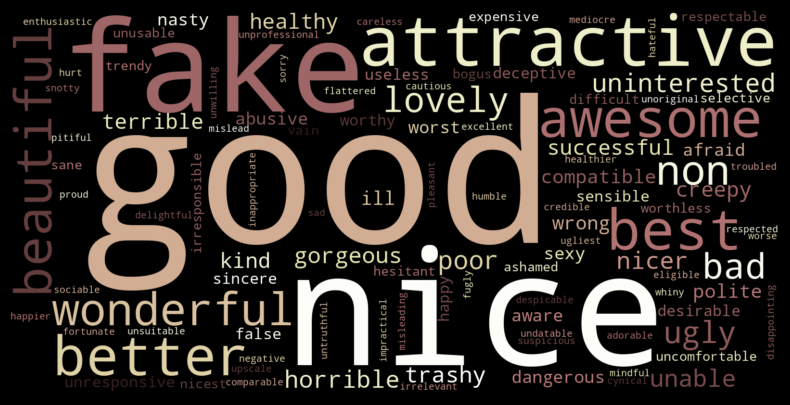

In [38]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [39]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/1636 [00:00<?, ?it/s]

['great', 'gay', 'worthy', 'superior', 'dear']
['better', 'quality', 'good']
['ideal', 'kind', 'like']
['elderly', 'cautious', 'rich']
['happier', 'happy']
['interested', 'interesting']
['reasonable', 'sensible']
['nicer', 'nicest']


In [40]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/759 [00:00<?, ?it/s]

['poor', 'lost', 'sick', 'blind', 'dead', 'handicapped']
['wrong', 'worse', 'bad']
['harder', 'hard', 'difficult']
['upset', 'ill', 'hurt']
['homeless', 'stupid', 'silly']
['confused', 'confusing']
['ugliest', 'ugly']
['annoying', 'evil']
['mislead', 'misleading']


__Curiosity__

In [41]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity", "exploration", "social"], not_query= ["space"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.70)

expansion: ['curiosity', 'exploration', 'social', 'discovery', 'innovation', 'insights', 'marketing', 'acquisition']


In [49]:
print("no relevant aspects")
query_ranking.head()

no relevant aspects


score  query_similarity
innovation   0.683675          0.800823
marketing    0.661105          0.769475
technology   0.662968          0.759639
insights     0.685371          0.733622
development  0.657567          0.710748

In [ ]:
print(f"positive: {pos}, negative: {neg}")
bumble_polarities.append(np.nan)
bumble_polarities.append(np.nan)

__Women__

In [44]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["women", "girls"], not_query= ["boy"],aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.74)
print(f"positive: {pos}, negative: {neg}")

expansion: ['women', 'girls', 'females', 'ladies', 'womens', 'feminists', 'models']
positive: 76.88229056203606, negative: 23.117709437963946


In [45]:
bumble_polarities.append(pos)
bumble_polarities.append(neg)

In [54]:
query_ranking.head()

score  query_similarity
women    0.646368          0.917901
girls    0.656983          0.855811
ladies   0.923021          0.818926
females  0.662736          0.801617
chicks   0.621706          0.740175

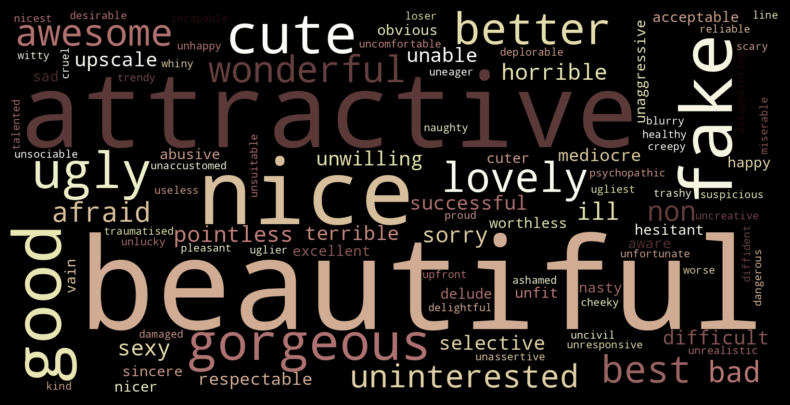

In [55]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [56]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/1021 [00:00<?, ?it/s]

['gay', 'great', 'bisexual', 'superior']
['better', 'quality', 'good']
['aged', 'elite', 'rich']
['interested', 'interesting']
['cute', 'cuter']
['kind', 'like']
['well', 'disposable']
['classier', 'classy']
['nicer', 'nicest']


In [57]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/422 [00:00<?, ?it/s]

['untouchable', 'stupid', 'unfortunate', 'silly', 'loser']
['needy', 'sick', 'dead']
['uglier', 'ugliest', 'ugly']
['loath', 'reluctant']
['worse', 'bad']
['upset', 'ill']


__Men__

In [46]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["man", "boy", "guy"], not_query=["girls", "women"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.84)

expansion: ['man', 'boy', 'guy', 'dude', 'he', 'brother', 'bro', 'boi']


In [47]:
print(f"positive: {pos}, negative: {neg}")
bumble_polarities.append(pos)
bumble_polarities.append(neg)

positive: 67.3913043478261, negative: 32.608695652173914


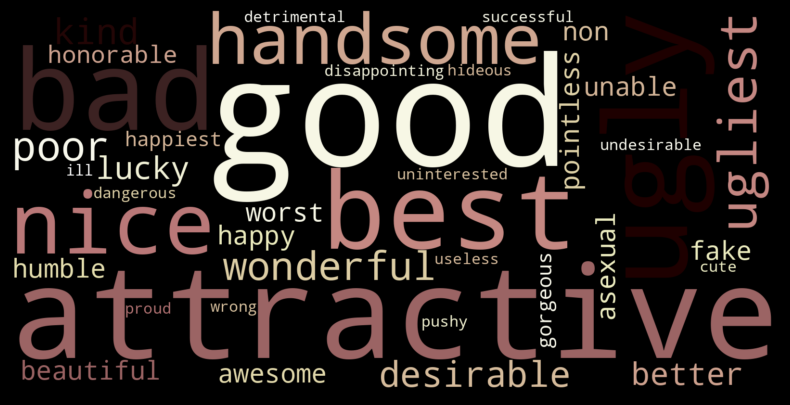

In [62]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [63]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/351 [00:00<?, ?it/s]

['better', 'good']
['great', 'gay']
['aged', 'rich']
['kind', 'like']
['happiest', 'happy']
['honorable', 'honest']


In [64]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/146 [00:00<?, ?it/s]

['needy', 'poor', 'dead']
['ugliest', 'ugly']
['wrong', 'bad']
['homeless', 'undesirable']


__Self esteem__

In [48]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.75)
print(f"positive: {pos}, negative: {neg}")

expansion: ['self', 'esteem', 'confidence', 'yourself', 'self-esteem', 'myself', 'themselves']
positive: 40.0, negative: 60.0


In [71]:
query_ranking.head()

score  query_similarity
self        0.667719          0.862039
myself      0.658253          0.794236
confidence  0.659440          0.780320
esteem      0.627702          0.756709
them        0.655270          0.686078

too few data


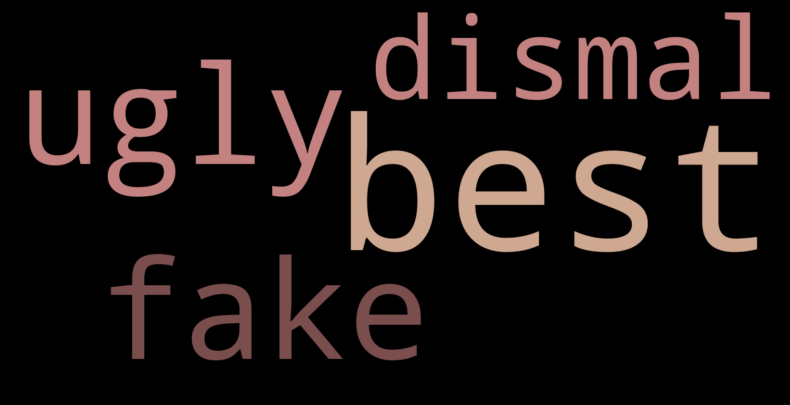

In [49]:
print("too few data")
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)
bumble_polarities.append(np.nan)
bumble_polarities.append(np.nan)

In [73]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/4 [00:00<?, ?it/s]

In [74]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/18 [00:00<?, ?it/s]

__Attractiveness (appearence)__

In [50]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence", "beauty"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.55)

expansion: ['attractiveness', 'appearence', 'beauty', 'appearance', 'apperance', 'personality', 'sexiness', 'stupidity']


In [51]:
print(f"positive: {pos}, negative: {neg}")
bumble_polarities.append(pos)
bumble_polarities.append(neg)

positive: 68.42105263157895, negative: 31.57894736842105


In [81]:
query_ranking.head()[:30]

score  query_similarity
appearance      0.644547          0.774414
personality     0.706103          0.741813
attractiveness  0.640983          0.695761
stupidity       0.673023          0.656400
beauty          0.674272          0.561083

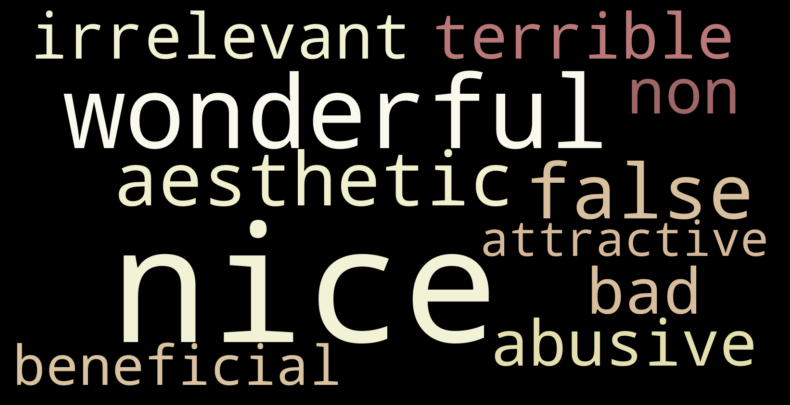

In [87]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [84]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/30 [00:00<?, ?it/s]

In [85]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/6 [00:00<?, ?it/s]

__Attractiveness (intelligence)__

In [52]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"],aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.6)
print(f"positive: {pos}, negative: {neg}")

expansion: ['witty', 'intelligence', 'intelligent', 'clever', 'humour', 'knowledge', 'profound']
positive: 51.06382978723404, negative: 48.93617021276596


In [53]:
bumble_polarities.append(pos)
bumble_polarities.append(neg)

In [94]:
query_ranking.head()

score  query_similarity
intelligence   0.663915          0.716737
knowledge      0.636754          0.700541
wise           0.658084          0.668579
sense          0.720696          0.632691
understanding  0.665585          0.621662

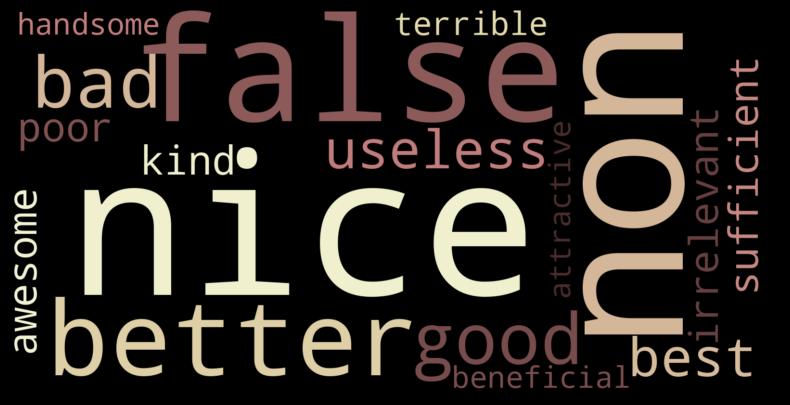

In [95]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [96]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/37 [00:00<?, ?it/s]

['better', 'good']


In [97]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/52 [00:00<?, ?it/s]

In [55]:
dating_app_polarities["Bumble"] = bumble_polarities

## __Hinge__

In [61]:
aspects_adjs, aspects_freq = aspect_extraction.get_aspects_adjs_and_freq(app= "hinge")

In [62]:
aspects_polarity = sentiment_extraction.get_aspects_polarity(aspects_adjs, app ="hinge")
aspects_score = general.normalize_series(aspects_polarity + aspects_freq)
aspects_embedding = embeddings.get_aspects_embeddings(aspects_freq, app="hinge")

In [63]:
hinge_polarities = []

__Casual sex__

In [64]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["sex", "casual"], not_query= ["couple"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.60)

expansion: ['sex', 'casual', 'sexual', 'sexo', 'sensual', 'anal', 'erotic']


In [115]:
print(f"positive: {pos}, negative: {neg}")


positive: 50.0, negative: 50.0


In [113]:
query_ranking.head()

score  query_similarity
sex      0.337593          0.812611
lesbian  0.357330          0.612015
gay      0.343410          0.589886
fetish   0.349358          0.544196
adult    0.347150          0.529873

too few data


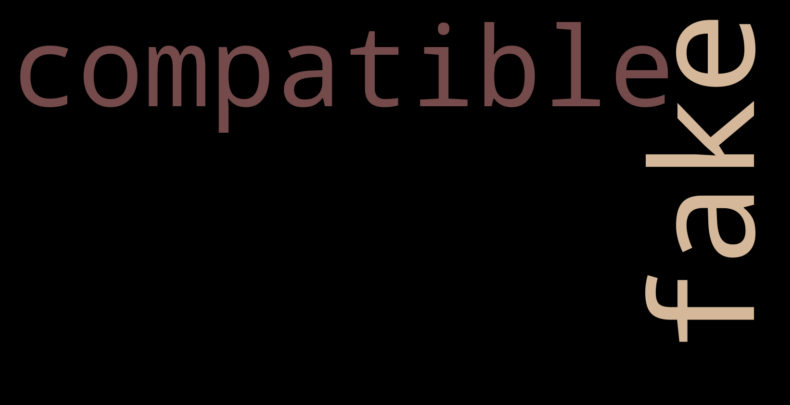

In [65]:
print("too few data")
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

hinge_polarities.append(np.nan)
hinge_polarities.append(np.nan)

__Relationship__

In [66]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "romantic", "couple"], not_query= ["friendship"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.73)

expansion: ['relationship', 'romantic', 'couple', 'married', 'boyfriend', 'husband', 'date', 'couples']


In [67]:
print(f"positive: {pos}, negative: {neg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)

positive: 62.06896551724138, negative: 37.93103448275862


In [139]:
query_ranking.head()

score  query_similarity
married       0.350399          0.822804
relationship  0.437403          0.818718
boyfriend     0.367113          0.805093
couple        0.383327          0.793299
husband       0.366603          0.780680

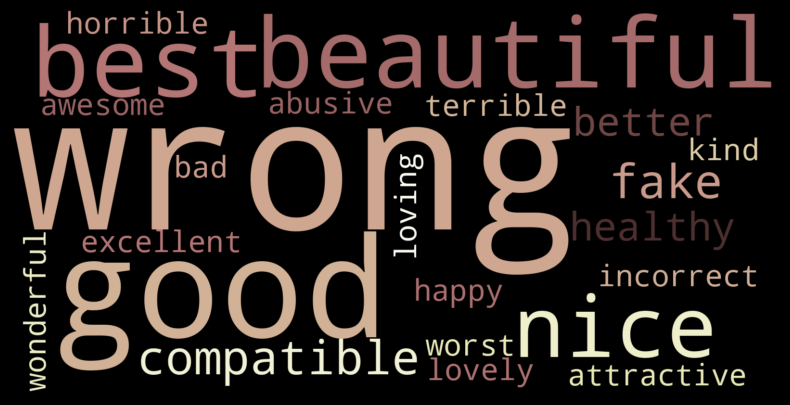

In [141]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [142]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/58 [00:00<?, ?it/s]

['better', 'good']
['ideal', 'kind']


In [143]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/33 [00:00<?, ?it/s]

['wrong', 'bad']


__Friendship__

In [68]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends", "networking"], not_query= ["love"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.69)

expansion: ['friendship', 'friends', 'networking', 'relationships', 'connections', 'relationship', 'social', 'friendships']


In [186]:
query_ranking.head()

score  query_similarity
relationships  0.393510          0.874245
relationship   0.437403          0.821643
friendship     0.345118          0.785669
friends        0.408134          0.766438
friendships    0.356517          0.758929

In [69]:
print(f"positive: {pos}, negative: {neg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)

positive: 75.79281183932348, negative: 24.207188160676534


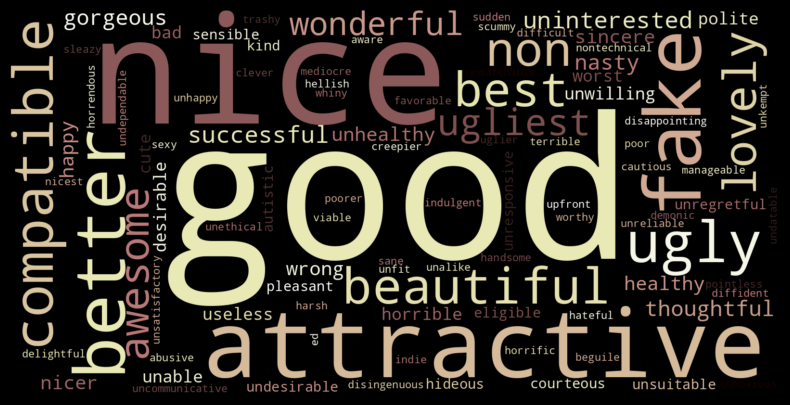

In [187]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [188]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/1244 [00:00<?, ?it/s]

['great', 'worthy', 'gay', 'intellectual']
['better', 'quality', 'good']
['ideal', 'kind', 'like']
['interested', 'interesting']
['cautious', 'rich']
['nicer', 'nicest']
['classier', 'classy']


In [189]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/452 [00:00<?, ?it/s]

['harder', 'hard', 'difficult']
['uglier', 'ugliest', 'ugly']
['disappointing', 'frustrated']
['wrong', 'bad']
['terrible', 'horrendous']
['annoying', 'evil']
['undesirable', 'stupid']
['sick', 'poor']
['hideous', 'horrific']
['inevitable', 'worst']


__Curiosity__

In [70]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity", "exploration", "social"], not_query= ["space"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.70)

expansion: ['curiosity', 'exploration', 'social', 'discovery', 'innovation', 'insights', 'marketing', 'acquisition']


In [177]:
print(f"positive: {pos}, negative: {neg}")

positive: 33.33333333333333, negative: 66.66666666666666


In [71]:
print("no relevant data")

hinge_polarities.append(np.nan)
hinge_polarities.append(np.nan)

query_ranking.head()

no relevant data


score  query_similarity
innovation   0.351152          0.800823
marketing    0.329376          0.769475
technology   0.351439          0.759639
development  0.323791          0.710748
discovery    0.349149          0.705888

__Women__

In [72]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["women", "girls"], not_query= ["boy"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.74)
print(f"positive: {pos}, negative: {neg}")

expansion: ['women', 'girls', 'females', 'ladies', 'womens', 'feminists', 'models']
positive: 70.47619047619048, negative: 29.523809523809526


In [73]:
print(f"positive: {pos}, negative: {neg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)

positive: 70.47619047619048, negative: 29.523809523809526


In [123]:
query_ranking.head()

score  query_similarity
women    0.575804          0.917901
girls    0.523793          0.855811
ladies   0.394191          0.818926
females  0.332899          0.801617
chicks   0.358825          0.740175

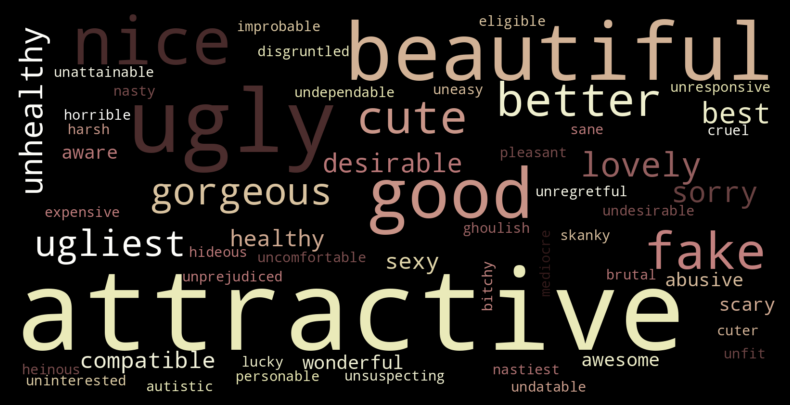

In [121]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [149]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/4 [00:00<?, ?it/s]

In [150]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/8 [00:00<?, ?it/s]

__Men__

In [74]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["man", "boy", "guy"], not_query=["girls", "women"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.84)

expansion: ['man', 'boy', 'guy', 'dude', 'he', 'brother', 'bro', 'boi']


In [75]:
print(f"positive: {pos}, negative: {neg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)

positive: 85.04672897196261, negative: 14.953271028037381


In [128]:
query_ranking.head()

score  query_similarity
dude  0.377032          0.913715
boy   0.341643          0.886162
guy   0.524169          0.868454
man   0.449236          0.840760
bro   0.346085          0.836664

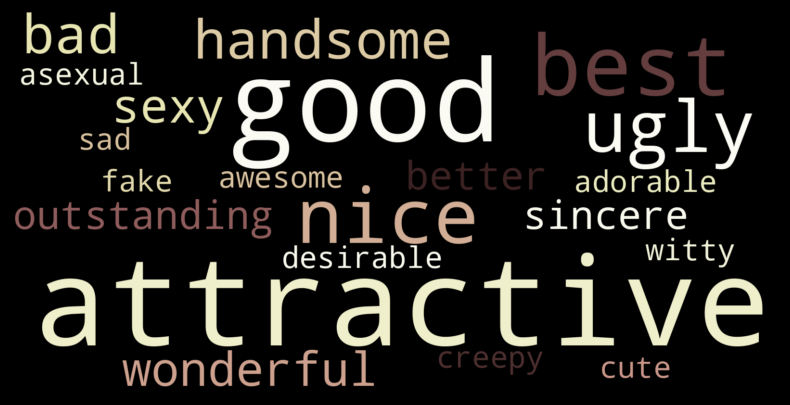

In [130]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [152]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/4 [00:00<?, ?it/s]

In [151]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/8 [00:00<?, ?it/s]

__Self esteem__

In [76]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.75)
print(f"positive: {pos}, negative: {neg}")

expansion: ['self', 'esteem', 'confidence', 'yourself', 'self-esteem', 'myself', 'themselves']
positive: 100.0, negative: 0.0


In [157]:
query_ranking.head()

score  query_similarity
appearance      0.349813          0.774414
personality     0.372749          0.741813
attractiveness  0.342046          0.695761
beauty          0.346743          0.561083
ability         0.406160          0.550966

too few data


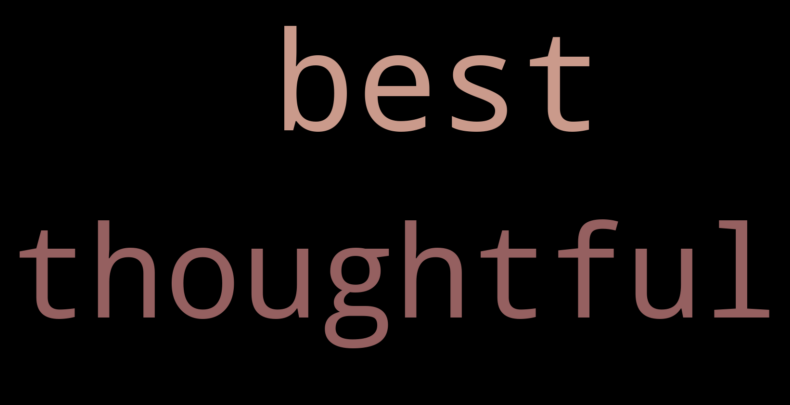

In [77]:
print("too few data")
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)
hinge_polarities.append(np.nan)
hinge_polarities.append(np.nan)

__Attractiveness (appearence)__

In [78]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence", "beauty"], aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold=0.55)

expansion: ['attractiveness', 'appearence', 'beauty', 'appearance', 'apperance', 'personality', 'sexiness', 'stupidity']


In [79]:
print(f"positive: {pos}, negative: {neg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)

positive: 83.33333333333334, negative: 16.666666666666664


In [156]:
query_ranking.head()

score  query_similarity
appearance      0.349813          0.774414
personality     0.372749          0.741813
attractiveness  0.342046          0.695761
beauty          0.346743          0.561083
ability         0.406160          0.550966

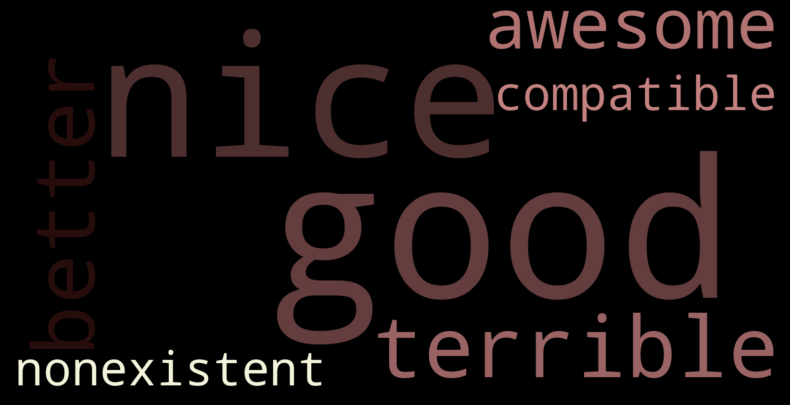

In [159]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [170]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/3 [00:00<?, ?it/s]

In [171]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/4 [00:00<?, ?it/s]

__Attractiveness (intelligence)__

In [80]:
pos, neg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"],aspects_embedding = aspects_embedding, aspects_adjs = aspects_adjs, aspects_score = aspects_score, threshold= 0.6)

expansion: ['witty', 'intelligence', 'intelligent', 'clever', 'humour', 'knowledge', 'profound']


In [81]:
print(f"positive: {pos}, negative: {neg}")
hinge_polarities.append(pos)
hinge_polarities.append(neg)

positive: 84.61538461538461, negative: 15.384615384615385


In [162]:
query_ranking.head()

score  query_similarity
intelligence   0.351852          0.716737
knowledge      0.338011          0.700541
wise           0.339466          0.668579
sense          0.374515          0.632691
understanding  0.369933          0.621662

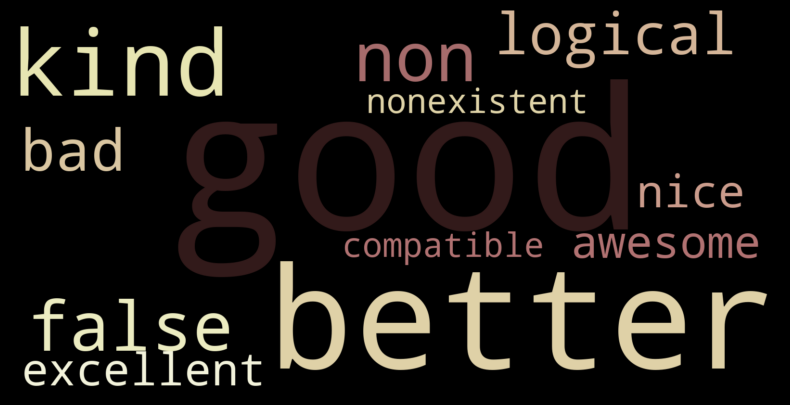

In [164]:
sentiment_extraction.get_wordcloud(query_aspects, aspects_adjs)

In [174]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "pos")

  0%|          | 0/32 [00:00<?, ?it/s]

['better', 'good']
['kind', 'like']


In [175]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, aspects_adjs, polarity= "neg")

  0%|          | 0/11 [00:00<?, ?it/s]

In [82]:
dating_app_polarities["Hinge"] = hinge_polarities

In [ ]:
dating_app_polarities.to_pickle("data/dating_apps_polarity.pickle")

## __Comparing__

In [111]:
dating_app_polarities = pd.read_pickle("data/dating_apps_polarity.pickle")

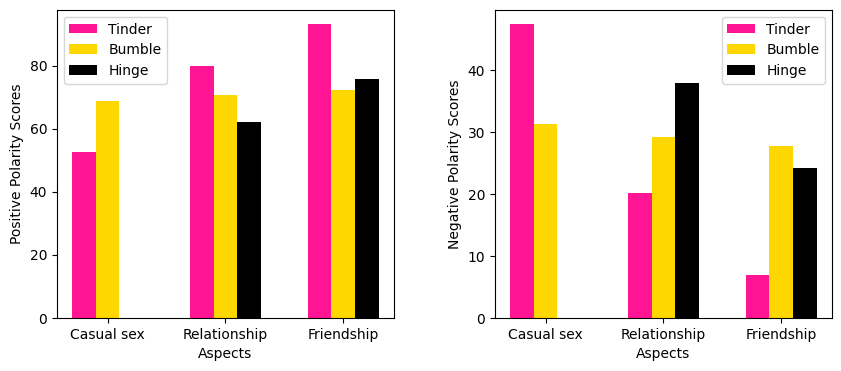

In [211]:
visualizer.plot_apps_polarity(dating_app_polarities, start_aspect = 0, end_aspect = 6, figsize=(10,4))

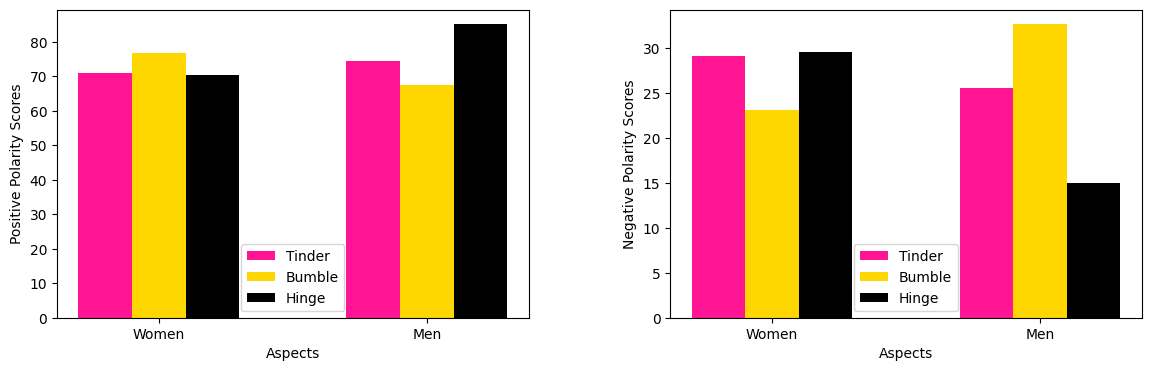

In [212]:
visualizer.plot_apps_polarity(dating_app_polarities, start_aspect=8, end_aspect=12, figsize=(14,4))

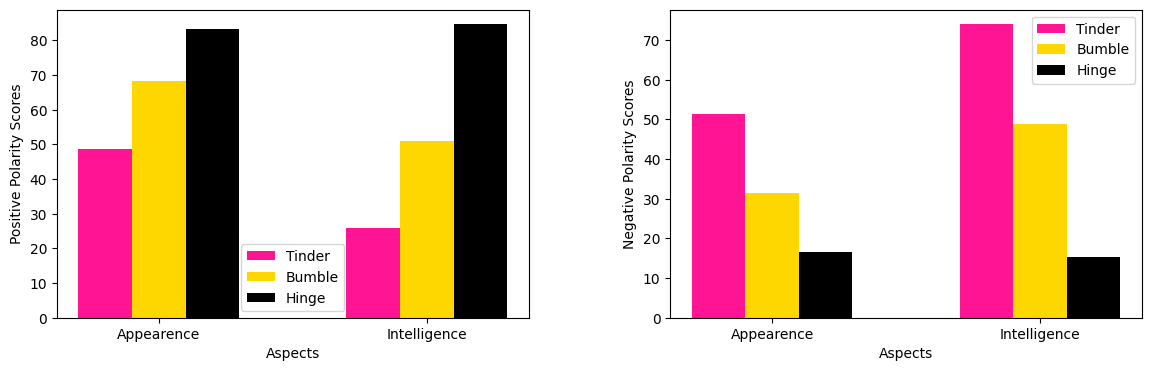

In [213]:
visualizer.plot_apps_polarity(dating_app_polarities, start_aspect=14, end_aspect=18, figsize=(14,4))